### <center>SSE Classifier</center>

#### <span style = "color:red">Get the Data</span>

In [132]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data_5.csv')

In [133]:
data = data.drop(['Cryo', 'PDB', 'Cryo Type', 'neighbor trees', 'Peak Level', 'Size Cutoff >'], axis = 1)
columns = {'Map Resolution': 'Resolution', 'vTree#':'Tree_N', 'numOfVoxels': 'Voxel_N', 'numberOfNeighbors':'N_Neighbors', 'Max Density':'Max_density', 'MinDensity':'Min_density', 'AvgDensity':'Avg_density', 'stdDensity':'Std_density', 'Percentage of voxels within 1 std':'1_std', 'Percentage of voxels within 2 std':'2_std', 'PCA_EigenValue1':'PCA_1', 'PCA_EigenValue2':'PCA_2', 'PCA_EigenValue3':'PCA_3', 'PCA Thickness Ratio ev1/ev2':'Thick_R_12', 'PCA Thickness Ratio ev2/ev3':'Thick_R_23', 'Structure Tensor Helix (Percentage)':'Tensor_helix', 'Structure Tensor Sheet (Percentage)':'Tensor_sheet', 'Percentage of voxels with density less than average':'Per_voxel', 'Radius of Gyration':'R_Gyr', 'Width':'Width', 'Hlx overlap (percentage)':'Hlx_Per', 'Strand overlap (percentage)':'Sheet_Per', 'Loop overlap (percentage)':'Loop_Per', 'Unknown (percentage) - most likely outside protein model (noise)':'Unknown'}
data = data.rename(columns=columns)

In [134]:
temp = data[['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown']]
max_Per = np.max(temp, axis=1)
#temp.shape, max_Per.shape
data['Max_Per'] = max_Per
data.head()
threshold = 0.9 # select data whose maximum overlap percentage is greater than a threshold
data = data[data['Max_Per'] > threshold]
data = data.drop(['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown', 'Max_Per'], axis = 1)

In [135]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
1,5.6,73,125,6,0.65,0.51,0.57,0.04,0.62,0.98,...,5.79,2.31,1.60,2.51,0.50,0.50,0.53,4.2,5.16151,Loop
3,5.6,103,92,4,0.65,0.46,0.54,0.04,0.62,0.98,...,3.60,2.27,2.05,1.58,0.45,0.55,0.52,3.7,3.64974,Loop
5,5.6,116,78,4,0.60,0.46,0.52,0.03,0.60,0.99,...,2.56,1.57,5.50,1.63,0.54,0.46,0.50,4.3,2.10718,Loop
6,5.6,102,94,5,0.62,0.49,0.54,0.03,0.64,0.96,...,3.11,2.04,3.35,1.53,0.46,0.54,0.50,4.0,4.47000,Loop
7,5.6,66,132,3,0.66,0.49,0.55,0.04,0.62,0.97,...,4.63,3.38,1.49,1.37,0.67,0.33,0.55,3.9,5.16151,Helix


In [136]:
data = data.loc[(data['Thick_R_12'] > 0) & (data['Thick_R_23'] > 0) & (data['Resolution'] >= 5.3), :] # remove the negative Thick_R_12 and Thick_R_23

In [137]:
data_Helix = data[data['Label'] == 'Helix']
data_Sheet = data[data['Label'] == 'Sheet']
data_Loop = data[data['Label'] == 'Loop']
data_Unknown = data[data['Label'] == 'Unknown']

print(data_Helix.shape, data_Sheet.shape, data_Loop.shape, data_Unknown.shape)

(2026, 21) (784, 21) (590, 21) (239, 21)


In [138]:
data_Helix = data_Helix.sample(n = 600, random_state = 42)
data_Sheet = data_Sheet.sample(n = 600, random_state = 42)
data_Loop = data_Loop.sample(n = 590, random_state = 42)

In [139]:
data = pd.concat([data_Helix, data_Sheet, data_Loop])

In [140]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
7040,7.7,6,72,3,0.61,0.43,0.49,0.05,0.67,0.94,...,3.70,2.65,2.10,1.40,0.75,0.25,0.60,3.8,3.75659,Helix
4833,6.6,428,59,2,0.52,0.44,0.47,0.03,0.59,1.00,...,1.93,1.52,1.58,1.27,0.20,0.80,0.54,2.6,3.67696,Helix
8285,6.8,16,142,5,0.83,0.71,0.76,0.03,0.68,0.96,...,5.34,3.24,4.63,1.65,0.68,0.32,0.54,5.8,3.11769,Helix
3591,8.2,31,148,3,0.69,0.48,0.58,0.05,0.57,0.98,...,5.62,2.19,1.25,2.57,0.48,0.52,0.54,3.9,4.23745,Helix
7062,5.9,37,140,2,0.65,0.47,0.53,0.04,0.68,0.95,...,4.02,3.29,3.34,1.22,0.53,0.47,0.61,4.6,3.89469,Helix


In [141]:
data.describe()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,6.564274,70.341899,137.078771,2.998883,0.611849,0.474112,0.537832,0.033335,0.645346,0.970860,11.084961,3.752631,1.946006,2.944503,2.027816,0.504810,0.495279,0.525117,3.908883,4.167379
std,1.167254,87.374117,122.496880,1.646175,0.095551,0.068412,0.075729,0.014315,0.040203,0.018767,12.381270,2.356443,0.992290,2.612246,0.941369,0.184097,0.184089,0.044797,1.434574,1.739913
min,5.500000,1.000000,10.000000,0.000000,0.230000,0.190000,0.210000,0.000000,0.460000,0.870000,0.290000,0.380000,0.120000,0.100000,0.350000,0.000000,0.000000,0.330000,1.300000,0.000000
25%,5.800000,18.000000,48.250000,2.000000,0.540000,0.430000,0.490000,0.020000,0.620000,0.960000,4.400000,2.250000,1.210000,1.650000,1.430000,0.380000,0.380000,0.500000,2.900000,3.105000
50%,5.900000,38.000000,104.000000,3.000000,0.610000,0.470000,0.530000,0.030000,0.640000,0.970000,7.680000,3.340000,1.910000,2.235000,1.780000,0.480000,0.520000,0.530000,3.800000,3.900000
75%,6.900000,82.000000,189.000000,4.000000,0.670000,0.510000,0.580000,0.040000,0.670000,0.980000,12.875000,4.727500,2.537500,3.180000,2.300000,0.620000,0.620000,0.550000,4.600000,4.864150
max,10.000000,488.000000,1252.000000,10.000000,0.950000,0.770000,0.870000,0.090000,0.850000,1.000000,211.190000,31.670000,7.970000,49.870000,10.640000,1.000000,1.000000,0.710000,14.900000,17.490000


#### <span style = "color:red">Discover and visualize the data to gain insights</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a358d2890>,
      dtype=object)

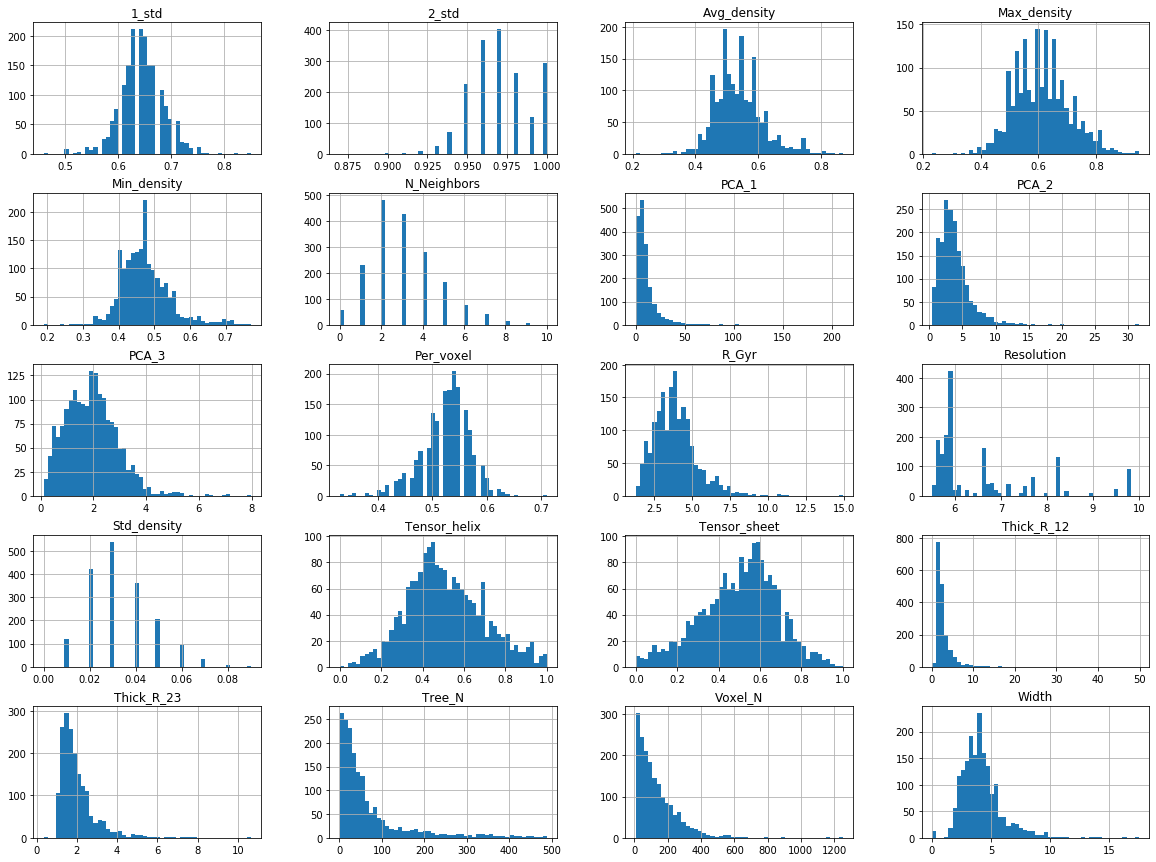

In [142]:
data.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Prepare Training Set and Test Set</span>

In [143]:
data_X = data.iloc[:, 0:-1]
data_Y = data.iloc[:, -1]

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
data_Y[data_Y == 'Helix'] =0
data_Y[data_Y == 'Sheet'] =1
data_Y[data_Y == 'Loop'] = 2

In [146]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=42, stratify = data_Y)
train_Y = train_Y.astype(np.int64)
test_Y = test_Y.astype(np.int64)

In [147]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

#### <span style = "color:red">Prepare the Data for Machine Learning Algorithms</span>

In [148]:
# Select specific columns
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Create Pipeline for Numeric Columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

left_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr'])),
    ("transform", QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=42))
])

right_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['N_Neighbors'])),
])

from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("left_pipeline", left_pipeline),
        ("right_pipeline", right_pipeline),
    ])

train_X = pd.DataFrame(preprocess_pipeline.fit_transform(train_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'N_Neighbors'])
test_X = pd.DataFrame(preprocess_pipeline.transform(test_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'N_Neighbors'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a359c0250>,
      dtype=object)

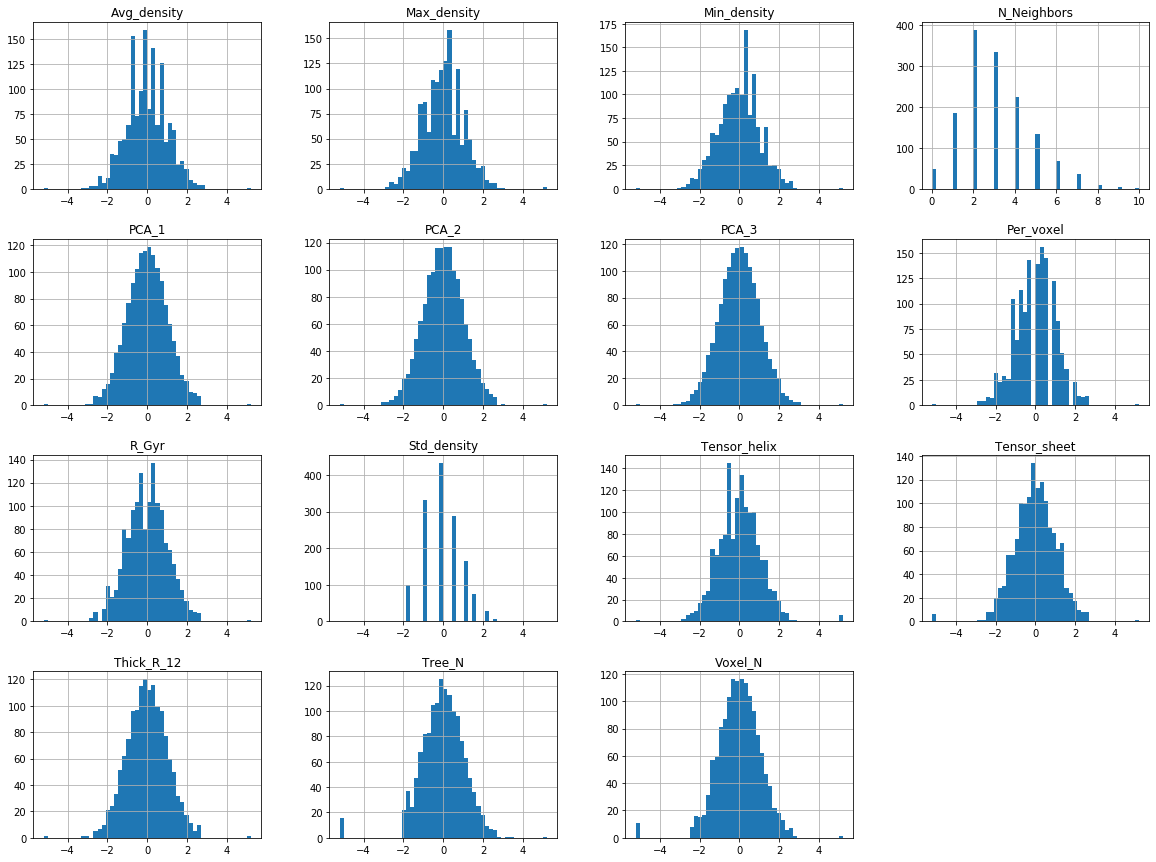

In [149]:
train_X.hist(bins = 50, figsize = (20, 15))

#### <span style="color:red">Select Models</span>

In [150]:
models = [] # save models
model_names = ['RFT', 'LR', 'LinearSVM', 'SVM', 'KNN', 'ANN', 'XGBoost']

from sklearn.ensemble import RandomForestClassifier
models.append(RandomForestClassifier())

from sklearn.linear_model import LogisticRegression
models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))

from sklearn.svm import LinearSVC
models.append(LinearSVC(loss="hinge"))

from sklearn.svm import SVC
models.append(SVC())

from sklearn.neighbors import KNeighborsClassifier
models.append(KNeighborsClassifier())

from sklearn.neural_network import MLPClassifier
models.append(MLPClassifier())

import xgboost
models.append(xgboost.XGBClassifier())

In [151]:
# accuracy
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10)
    print(model_names[index], mean, std)

RFT 0.6299290986790986 0.04768054545950549
LR 0.6208236208236209 0.03434802660321523
LinearSVM 0.6215229215229215 0.040228408581016735
SVM 0.6375922688422688 0.04305845984417712
KNN 0.5712558275058275 0.031674533182899124
ANN 0.6284916472416472 0.03405831405686087
XGBoost 0.6236208236208236 0.041357271429691964


In [152]:
# f1
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10, metric = 'f1_macro')
    print(model_names[index], mean, std)

RFT 0.6141732360709621 0.05084047999139436
LR 0.6190743419157387 0.03371844860042017
LinearSVM 0.6174982418340447 0.03793673359266624
SVM 0.6345492611939612 0.042990098533098466
KNN 0.5691906903739573 0.02990401872826789
ANN 0.612295229174605 0.02813815021198637
XGBoost 0.6220663308604808 0.041577597071808754


#### <span style = "color:red">Fine-Tune Models</span>

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
# Random Forest
param_grid = [{'n_estimators': [1500], 'max_features': ['sqrt']}]
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
rft_clf = grid_search.best_estimator_

[0.63005207]


In [155]:
# SVM
param_grid = [{'C': [1.2, 1.4, 1.6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'] }]
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
svm_clf = grid_search.best_estimator_

[0.61337601 0.6049878  0.6353198  0.47425057 0.61337601 0.61805829
 0.63384771 0.37055861 0.61476448 0.60794398 0.63314607 0.47325981
 0.61476448 0.61722772 0.63081588 0.37014749 0.61413185 0.61076347
 0.63377818 0.47451221 0.61413185 0.61867118 0.62611908 0.36835035]


In [156]:
# MLP
param_grid = [{'hidden_layer_sizes': [(100,), (50,), (150,)], 'activation': ['tanh']}]
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
mlp_clf = grid_search.best_estimator_

[0.63258907 0.63486389 0.64286197]


In [157]:
# XGBoost
param_grid = [{'eta': [0.2], 'n_estimators': [100, 200, 300], 'tree_method': ['auto']}]
grid_search = GridSearchCV(xgboost.XGBClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
xgboost_clf = grid_search.best_estimator_

[0.62206633 0.62428589 0.61705142]


In [158]:
# Logistic Regression
param_grid = [{'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.8, 1.0, 1.2]}]
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
lr_clf = grid_search.best_estimator_

[       nan 0.62050992        nan        nan 0.61907434        nan
        nan 0.61967024        nan]


#### <span style = "color:red">Ensemble Models</span>

In [159]:
# Voting
from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(
#    estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)],
#    voting='hard')

#mean, std = cross_validation(voting_clf, train_X, train_Y, 10)
#print(mean, std)

In [160]:
# Stacking
from sklearn.ensemble import StackingClassifier
#estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)]
#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

#mean, std = cross_validation(stacking_clf, train_X, train_Y, 10)
#print(mean, std)

#### <span style = "color:red">Evaluate System on the Test Set</span>

In [161]:
estimators=[('rft', rft_clf), ('svm', svm_clf), ('xgboost', xgboost_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(train_X, train_Y)
y_test_pred = stacking_clf.predict(test_X)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_test_pred, target_names=['Helix', 'Sheet', 'Loop']))

              precision    recall  f1-score   support

       Helix       0.69      0.58      0.63       120
       Sheet       0.69      0.68      0.69       120
        Loop       0.57      0.67      0.62       118

    accuracy                           0.65       358
   macro avg       0.65      0.65      0.65       358
weighted avg       0.65      0.65      0.65       358



#### <span style = "color:red">Reference</span>
* <a href = "https://xgboost.readthedocs.io/en/latest/index.html">XGBoost</a>